## Inicio - Dataset Car Prices

Este dataset contiene información de ventas de autos de todo tipo y marcas variadas desde los mas caros del mercado hasta los más accesibles, cuenta con información sobre la venta, modelo, color, estado, etc.

sellingprice es la variable objetivo a predecir. Significa: Precio de venta

### Contexto Comercial

Actualmente se está trabajando en la solicitud de una automotora que cuenta con una plataforma donde postea sus autos usados y en base a datos históricos desea mejorar la fijación de precios de los nuevos autos que ingresen.

Obtener un buen resultado en la fijación de precios los ayudará tanto en la rentabilidad como en la rotación de vehículos.

### Problema Comercial

La automotora en cuestión está teniendo ciertos problemas actualmente con la rotación (venta) de sus vehículos a través de la plataforma y consideran que el problema sea la precisión de precios al estimar el valor de los autos que ingresan. 

Esto desengloba en dos problemas:
- Precios Subestimados: Menos ganancia porque los autos se venden por menos de su valor real.
- Precios Sobreestimados: Los autos no se venden rápidamente, aumentando los costos de almacenamiento y disminuyendo la rotación del inventario.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
warnings.filterwarnings("ignore")

Establecemos algunas configuraciones de estilo y de muestra de datos al utilizar Pandas y Seaborn

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
sns.set_style('darkgrid')

## Lectura del dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/maxidom99/DataScience-CoderHouse/refs/heads/main/MaximilianoDominguez_car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Descripcion de cada columna y tipo de dato que contiene

- year: Año del modelo del auto (int64) [1982 al 2015]
- make: Marca del auto (object) Ejemplos: ['Aston Martin', 'Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Dodge', 'FIAT','Ferrari','Ford', 'Honda']
- model: Modelo del auto (object) Ejemplos: ['tucson', 'tt', 'thunderbird','taurus', 'tahoe', 'tC', 'sx4', 'swift', 'subrbn','sprinter', 'sportage', 'sonoma']
- trim: Versión del auto (object) Ejemplos: ['Wagon XLT','Wagon Titanium LWB', 'Wagon', 'WS', 'WRX TR', 'WRX STi','WRX STI Limited', 'WRX STI', 'WRX Limited']
- body: Tipo de carrocería (object) Ejemplos: ['wagon', 'van', 'tsx sport wagon', 'transit van', 'suv','supercrew', 'supercab', 'sedan','quad cab', 'q60 coupe']
- transmission: Tipo de transmisión (object) Ejemplos: ['manual', 'automatic']
- vin: Número de identificación del vehículo (object)
- state: Estado (object) Ejemplos: ['ny', 'nv', 'ns', 'nm', 'nj', 'ne', 'nc', 'ms', 'ma', 'la', 'in', 'il', 'hi', 'ga', 'fl','co', 'ca']
- condition: Condición del auto (float64) [1 al 50]
- odometer: Kilometraje del auto (float64)
- color: Color exterior (object) Ejemplos: ['yellow', 'white', 'turquoise', 'silver', 'red', 'lime', 'green', 'gray', 'gold','charcoal','blue', 'black']
- interior: Color interior (object) Ejemplos: ['yellow', 'white', 'tan', 'silver', 'red', 'purple', 'orange','burgundy','black', 'beige']
- seller: Vendedor (object) Ejemplos: ['zygi auto corp', 'zumbrota ford sales llc', 'zuma autoboat','101motors', '1 for all auto sales', '1 cochran of monroeville']
- mmr: Precio promedio de mercado (float64) Ejemplo: 21500.0
- sellingprice: Precio de venta (float64) Ejemplo: 21500.0
- saledate: Fecha de venta (object) Ejemplo: [Wed May 27 2015 17:00:00 GMT-0700 (PDT)]

## Estadística descriptiva

In [4]:
df.shape

(558837, 16)

El dataset elegido cuenta con 558837 filas y 16 columnas, de las cuales 10 (diez) son variables independientes a analizar y el target es sellingprice

In [5]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


A pesar de ver varias columnas con algunos valores vacios el DataFrame esta bastante completo

## Columnas categóricas

In [6]:
df.describe(include = 'object').T

,count,unique,top,freq
make,548536,96,Ford,93554
model,548438,973,Altima,19349
trim,548186,1963,Base,55817
body,545642,87,Sedan,199437
transmission,493485,4,automatic,475915
vin,558833,550297,automatic,22
state,558837,64,fl,82945
color,558088,46,black,110970
interior,558088,17,black,244329
seller,558837,14263,nissan-infiniti lt,19693


Aqui notamos algunas inconsistencias en los datos:

- Columna [vin]: (Número de identificación del vehículo) encontramos valores automatic que debemos limpiar antes de trabajar el dataframe
- Columna [transmission]: con varios valores nulos, podemos ver si la marca y modelo del auto se repite y tiene datos en la columna transmision, en caso de ser asi podemos completar los datos faltantes en nuestro dataframe.

## Columnas numéricas

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


In [8]:
numericas_null = pd.DataFrame({'Cantidad de Vacios' : df.isnull().sum(), 'Porcentaje' : round((df.isnull().sum()) / (len(df)) * (100), 2)})
numericas_null = numericas_null[numericas_null['Cantidad de Vacios'] != 0]
numericas_null

,Cantidad de Vacios,Porcentaje
make,10301,1.84
model,10399,1.86
trim,10651,1.91
body,13195,2.36
transmission,65352,11.69
vin,4,0.00
condition,11820,2.12
odometer,94,0.02
color,749,0.13
interior,749,0.13


En las columnas numericas sobresale la columna [condition] que refiere a la condicion del auto, esta variable es categorica mas que numerica, debemos analizar bien estos datos y agrupar segun el estado real del coche.
Ademas tiene varios valores vacios al igual que transmission como vimos arriba...

## Cardinalidad

Una nueva verificacion de los datos para corroborar que los valores identificatorios como el [vin] sea correcto.

In [9]:
cardinalidad = pd.DataFrame({'Cantidad de Distintos' : df.nunique(), 'Porcentaje' : round((df.nunique()) / (df.shape[0]) * (100), 2), 'Filas totales': df.shape[0]})
cardinalidad

,Cantidad de Distintos,Porcentaje,Filas totales
year,34,0.01,558837
make,96,0.02,558837
model,973,0.17,558837
trim,1963,0.35,558837
body,87,0.02,558837
transmission,4,0.00,558837
vin,550297,98.47,558837
state,64,0.01,558837
condition,41,0.01,558837
odometer,172278,30.83,558837


## Limpieza y correccion de datos

Lista de variables a revisar con valores nulos:

##### Columna   |   Cantidad de nulos:
- make       |     10301
- model      |     10399
- trim       |     10651
- body       |     13195
- transmission  |  65352
- vin        |         4
- condition  |     11820
- odometer   |        94
- color      |       749
- interior   |       749
- mmr        |        38
- sellingprice   |    12
- saledate       |    12


Las mas alarmantes son make, model, trim, transmission y condition, entiendo que a medida que se encuentre una solucion para esos datos se corregiran los demas.

#### Body

In [10]:
# Filtrar las filas donde 'body' es nulo
body_null = df[df['body'].isna()]

# Identificar los modelos, version y tipo transmisiones que tienen valores nulos en 'body'
modelos = body_null[['model', 'trim', 'transmission']].drop_duplicates()

# Filtrar las filas que tienen valores en 'body' y coinciden con los modelos, trims y transmisiones anteriores
body_si = df[(df['body'].notna()) &
             (df['model'].isin(modelos['model'])) &
             (df['trim'].isin(modelos['trim'])) & 
             (df['transmission'].isin(modelos['transmission']))]

# Crear un diccionario con la combinación (model, version, transmission) y el valor más común de 'body'
body_mappings = body_si.groupby(['model', 'trim', 'transmission'])['body'].agg(lambda x: x.mode()[0]).to_dict()

# Rellenar los valores nulos en la columna 'body' usando el diccionario 'body_mappings'
df['body'] = df.apply(lambda row: body_mappings.get((row['model'], row['trim'], row['transmission']), row['body']) if pd.isna(row['body']) else row['body'], axis=1)

# Verificar que no queden filas vacías en 'body'
print(f''' -> Aún hay {df['body'].isnull().sum()} autos con 'body' vacío''')

 -> Aún hay 13195 autos con 'body' vacío


#### Transmission

Sabemos que hay 65352 autos donde el valor 'transmission' es nulo, trabajaremos los mismos de la siguiente manera:

In [11]:
# Guardamos en transmision_null los valores donde la transmiscion sea nula/vacia
transmision_null = df[df['transmission'].isna()]
# En la variable modelos guardamos los modelos que no cuentan con esta informacion.
modelos = transmision_null['model'].unique()
# Mientras que en transmision_si contaremos con la transmision de los modelos guardados anteriormente.
transmision_si = df[(df['transmission'].notna()) & (df['model'].isin(modelos))]

# Creamos un diccionario con el modelo y su transmisión más común con el metodo .mode()
trans_mappings = transmision_si.groupby('model')['transmission'].agg(lambda x: x.mode()[0]).to_dict()

# Rellenamos los valores nulos de la columna transmission con los valores del diccionario trans_mappings
df['transmission'] = df.apply(lambda row: trans_mappings[row['model']] if pd.isna(row['transmission']) and row['model'] in trans_mappings else row['transmission'], axis=1)

print(f''' -> Aún hay {df['transmission'].isnull().sum()} autos con 'transmission' vacío''')

 -> Aún hay 1819 autos con 'transmission' vacío


Luego de realizar un relleno de dos columnas (body, transmission) en base a la moda de los valores según similitudes en los modelos de autos importantes para nuestros análisis eliminamos las filas donde haya un valor vacío ya que no son muchas en relación a la cantidad de datos que tenemos.

Se decide eliminar estas filas con valores vacías ya que puede causar problemas a futuro y no hay otra forma de llenar los espacios con información que sea cercana a la realidad.

In [12]:
df.replace("", np.nan, inplace=True)
df = df.dropna()
print(f'Número de filas después del filtrado: {len(df)}')

Número de filas después del filtrado: 533643


Con estas 533643 filas vamos a trabajar 

### Autos vendidos por mayor precio

In [13]:
order_sellingprice = df.sort_values(by='sellingprice', ascending=False)
df_top_sellingprice = order_sellingprice[['make', 'sellingprice']].head(149)
df_top_sellingprice.sort_values(by='sellingprice', ascending=False)

,make,sellingprice
344905,Ford,230000.0
548169,Ferrari,183000.0
446949,Mercedes-Benz,173000.0
545523,Rolls-Royce,171500.0
125095,Rolls-Royce,169500.0
...,...,...
325839,BMW,103000.0
283536,BMW,103000.0
148560,Aston Martin,103000.0
503226,Audi,102800.0


Es inesperado que un modelo de auto Ford se encuentre en el top 1 de autos con mayor precio de venta, por lo que investigando un poco mas identifico la venta de dos autos Ford Escape con un sellingprice de 230000 y otro de 108200, esto probablemente haya sido un error ya que viendo otras ventas de los mismos modelos los precios varian entre los 20000 y 35000.

In [14]:
ford_escape = df[(df['make'] == 'Ford') & (df['model'] == 'Escape') & ((df.trim == 'XLT') | (df.trim == 'Titanium'))]
ford_escape = ford_escape.sort_values(by='sellingprice', ascending=False).head(10)
ford_escape[['make', 'model', 'sellingprice']]

,make,model,sellingprice
344905,Ford,Escape,230000.0
160201,Ford,Escape,108200.0
405998,Ford,Escape,32800.0
406864,Ford,Escape,32500.0
407201,Ford,Escape,30800.0
542847,Ford,Escape,27300.0
542850,Ford,Escape,27200.0
511591,Ford,Escape,27000.0
417541,Ford,Escape,27000.0
411717,Ford,Escape,26900.0


Arriba podemos ver que es un claro error de datos, por lo que no se tendra en cuenta para el analisis, los borrare y procedere a graficar.

In [15]:
df = df.drop(df[(df.make == 'Ford') & (df.model == 'Escape') & (df.sellingprice >= 108200.0 )].index)

df_top_sellingprice = df.drop(df[(df.make == 'Ford')
                                 & (df.model == 'Escape')
                                 & (df.sellingprice >= 108200.0 )].index).sort_values(by='sellingprice', ascending=False).head(149)[['make', 'sellingprice']]

## Análisis Gráficos

In [16]:
df_top_sellingprice.sort_values(by='sellingprice', ascending=False).head(5)

,make,sellingprice
548169,Ferrari,183000.0
446949,Mercedes-Benz,173000.0
545523,Rolls-Royce,171500.0
125095,Rolls-Royce,169500.0
557570,Rolls-Royce,169000.0


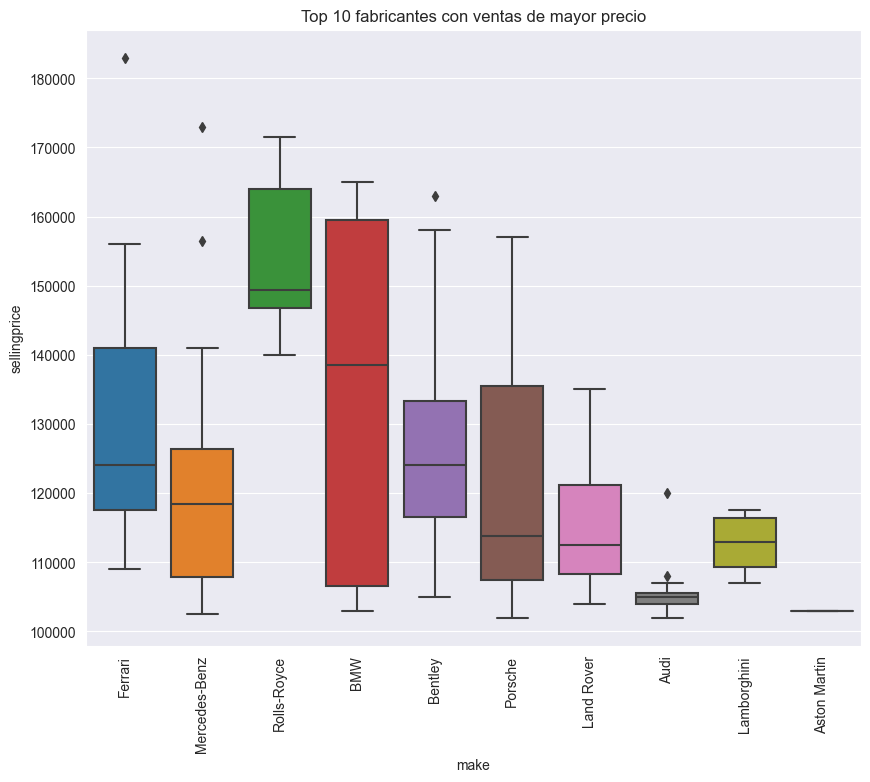

In [17]:
# Boxplot del top 10 precio de venta por marca
plt.figure(figsize=(10, 8))
sns.boxplot(x='make', y='sellingprice', data=df_top_sellingprice)
plt.xticks(rotation=90)
plt.title('Top 10 fabricantes con ventas de mayor precio')
plt.show()

Visualizamos las variables categoricas para entenderlas mejor y adentrarnos en nuestra informacion.

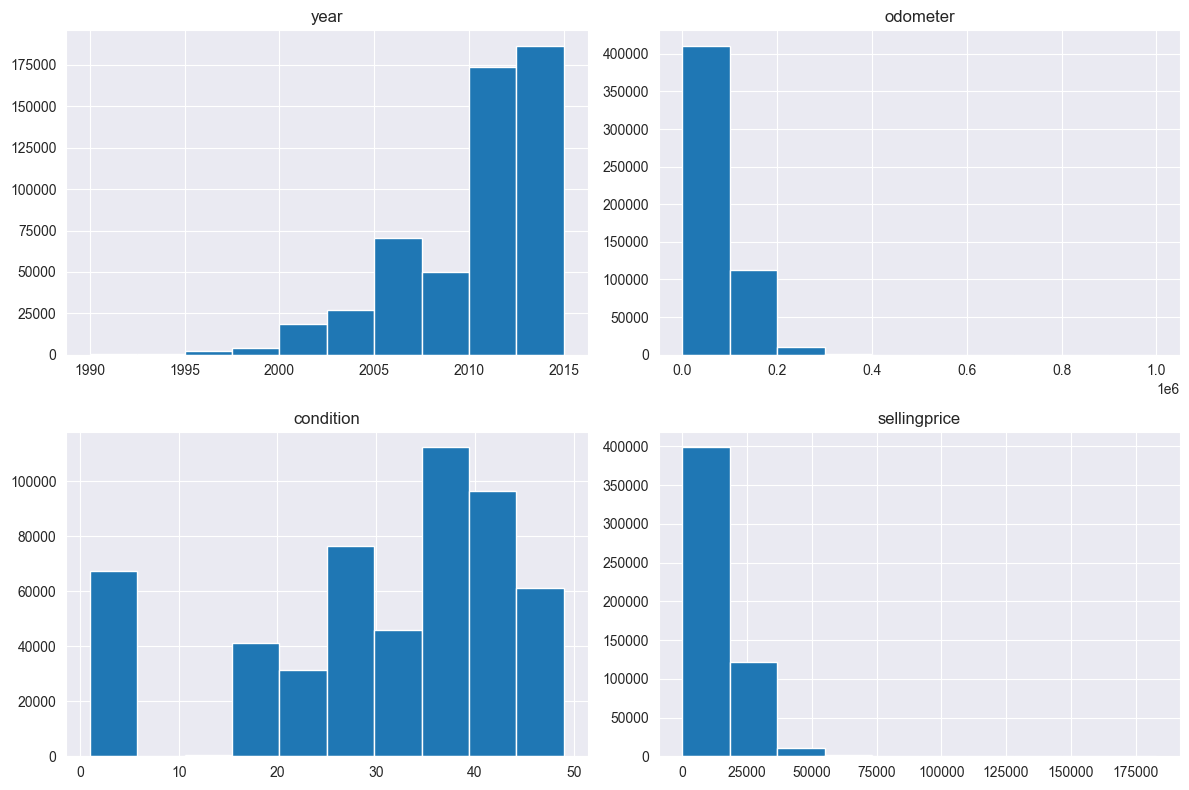

In [18]:
# Distribuciones de las variables
df[['year', 'odometer', 'condition', 'sellingprice']].hist(figsize=(12, 8), layout=(2, 2))

# Mostrar graficos
plt.tight_layout()
plt.show()

En la variable 'condition' se puede ver una falta de datos entre los valores 5 y 15, analizaremos un poco mas a fondo para entender que está sucediendo y como solucionarlo.

### Autos: Estado según Condición - Categoría por Año de fabricación, por precio y por odómetro

Mas alla de que la columna condición (condition), año (year), precio de venta (sellingprice), odómetro (odometer) sean numericas, son variables categóricas y debemos realizar ciertas agrupaciones según las variables y crear nuevas columna (Estado, Categoria_Year, Categoria_Precio, Categoria_Uso,) para no pisar los datos reales

In [19]:
# Construir variables categóricas
df['Estado'] = pd.cut(df['condition'], bins=[0, 10, 45, 50], labels=["Mal Estado", "Buen Estado", "Excelente Estado"])
df['Categoria_Year'] = pd.qcut(df['year'], q=3, labels=['Viejo', 'Medio', 'Nuevo'])
df['Categoria_Precio'] = pd.qcut(df['sellingprice'], q=3, labels=['Precio Bajo', 'Precio Medio', 'Precio Alto'])
df['Categoria_Uso'] = pd.qcut(df['odometer'], q=3, labels=['Bajo Uso', 'Medio Uso', 'Alto Uso'])

# Convertir a tipo categórico
df['Estado'] = df['Estado'].astype('category')
df['Categoria_Year'] = df['Categoria_Year'].astype('category')
df['Categoria_Precio'] = df['Categoria_Precio'].astype('category')
df['Categoria_Uso'] = df['Categoria_Uso'].astype('category')

# Convertir a códigos numéricos
df['Estado_num'] = df['Estado'].cat.codes
df['Categoria_Year_num'] = df['Categoria_Year'].cat.codes
df['Categoria_Precio_num'] = df['Categoria_Precio'].cat.codes
df['Categoria_Uso_num'] = df['Categoria_Uso'].cat.codes

# Revisar estadísticas descriptivas de categorías
df.describe(include='category')

,Estado,Categoria_Year,Categoria_Precio,Categoria_Uso
count,533641,533641,533641,533641
unique,3,3,3,3
top,Buen Estado,Medio,Precio Medio,Bajo Uso
freq,416943,245738,179466,177883


In [20]:
# Filtrando los 10 modelos mas vendidos
top_models = df['model'].value_counts().nlargest(10).index
top_model_data = df[df['model'].isin(top_models)]
top_model_data[['make', 'model','sellingprice','Categoria_Precio']].sort_values(by='model', ascending=False).sample(n=5)

,make,model,sellingprice,Categoria_Precio
388774,Ford,Focus,11900.0,Precio Medio
496460,BMW,3 Series,15000.0,Precio Medio
312506,Toyota,Camry,4000.0,Precio Bajo
341125,Honda,Accord,22500.0,Precio Alto
477905,Ford,Escape,16500.0,Precio Alto


In [21]:
#Muestra de las nuevas columnas comparadas con las columnas anteriores
df[['condition', 'Estado', 
    'sellingprice', 'Categoria_Precio', 
    'year', 'Categoria_Year',
    'odometer', 'Categoria_Uso']].sample(n=5)

,condition,Estado,sellingprice,Categoria_Precio,year,Categoria_Year,odometer,Categoria_Uso
501300,28.0,Buen Estado,10800.0,Precio Medio,2012,Medio,29831.0,Bajo Uso
392493,21.0,Buen Estado,2400.0,Precio Bajo,2004,Viejo,69171.0,Medio Uso
74024,43.0,Buen Estado,10000.0,Precio Medio,2013,Medio,37223.0,Medio Uso
485459,39.0,Buen Estado,3300.0,Precio Bajo,2002,Viejo,246472.0,Alto Uso
325501,47.0,Excelente Estado,15400.0,Precio Medio,2013,Medio,19305.0,Bajo Uso


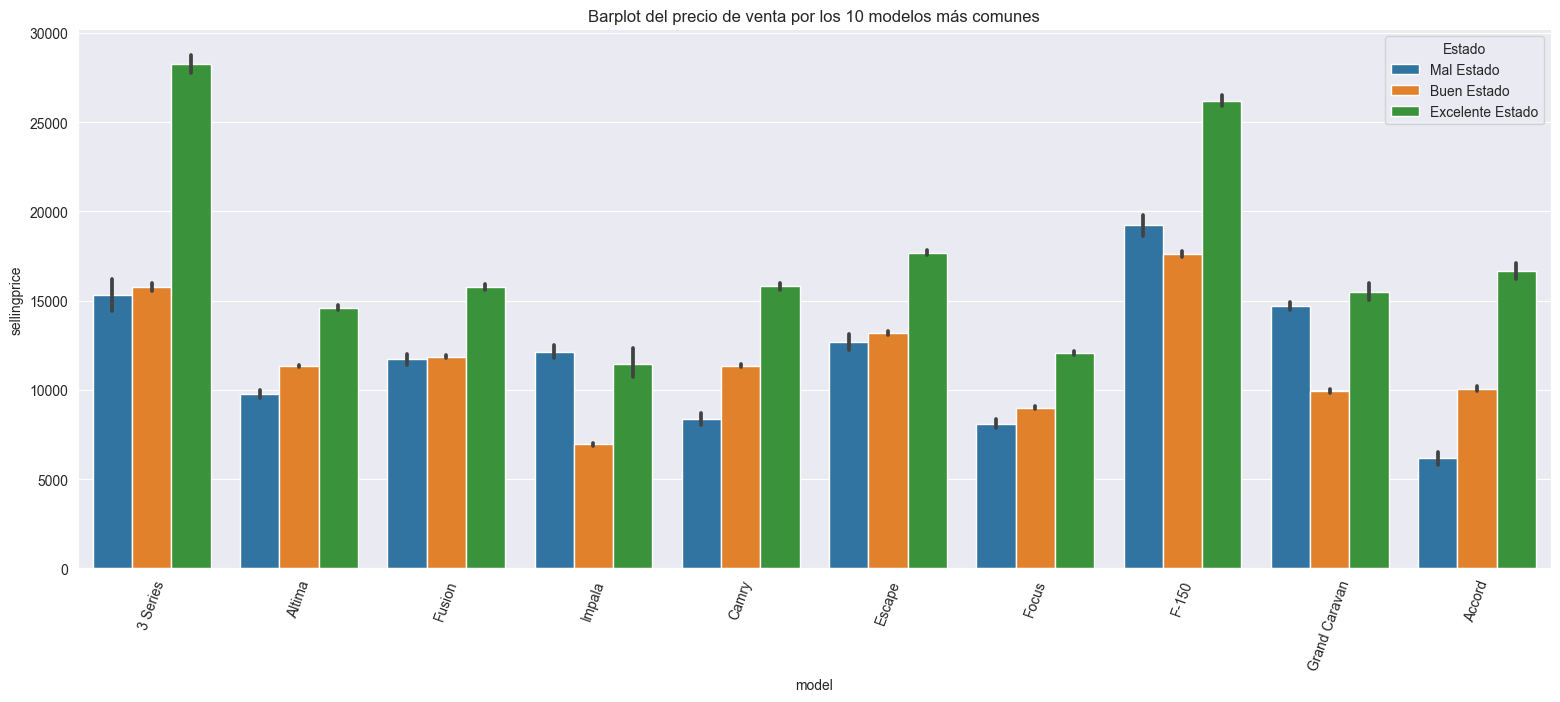

In [22]:
# Barplot del precio de venta por modelo (mostrando solo los 10 modelos más comunes)
plt.figure(figsize=(19, 7))
sns.barplot(x='model', y='sellingprice', hue='Estado', data=top_model_data)
plt.xticks(rotation=70)
plt.title('Barplot del precio de venta por los 10 modelos más comunes')
plt.show()

Generalmente no hay mucha diferencia de precio cuando el vehículo se encuentra en Mal o Buen estado, sin embargo si tiene un excelente estado el diferencial aumenta considerablemente.

In [23]:
# Top 5 de los autos mas vendidos
frec = df[['make','model']].value_counts().reset_index()
frec_df = pd.DataFrame(frec)
frec_df.head()

,make,model,count
0,Nissan,Altima,19159
1,Ford,F-150,14164
2,Ford,Fusion,12835
3,Toyota,Camry,12326
4,Ford,Escape,11712


Para asegurarnos de que estemos categorizando bien segun el valor de la condicion del auto vemos una pequeña muestra de algunos valores.

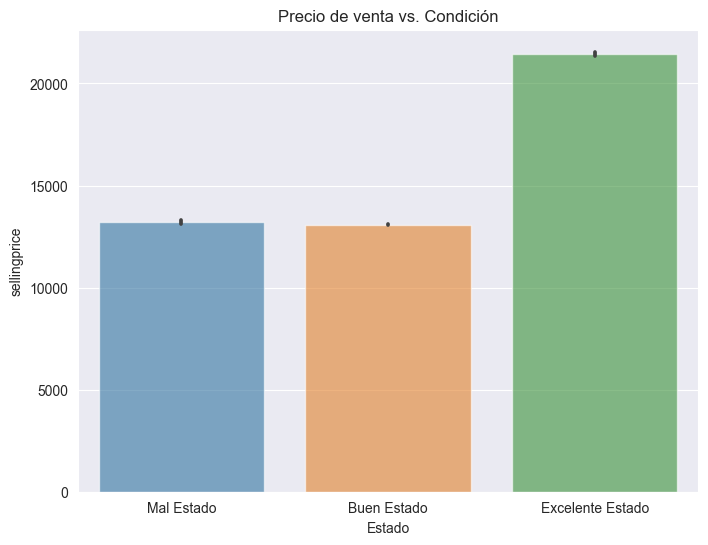

In [24]:
# Relación entre el precio de venta y la condición
plt.figure(figsize=(8, 6))
sns.barplot(x='Estado', y='sellingprice', data=df, alpha=0.6)
plt.title('Precio de venta vs. Condición')
plt.show()

#### Matriz de Correlación

Luego de entender un poco más nuestro dataset conservamos las más importantes para visualizar la correlación de las mismas

In [25]:
var_cat_correlation = df[['sellingprice', 'condition', 'odometer', 'year','mmr']].corr()
var_cat_correlation

,sellingprice,condition,odometer,year,mmr
sellingprice,1.000000,0.316718,-0.577011,0.579550,0.984187
condition,0.316718,1.000000,-0.313030,0.332901,0.275425
odometer,-0.577011,-0.313030,1.000000,-0.775209,-0.581933
year,0.579550,0.332901,-0.775209,1.000000,0.589192
mmr,0.984187,0.275425,-0.581933,0.589192,1.000000


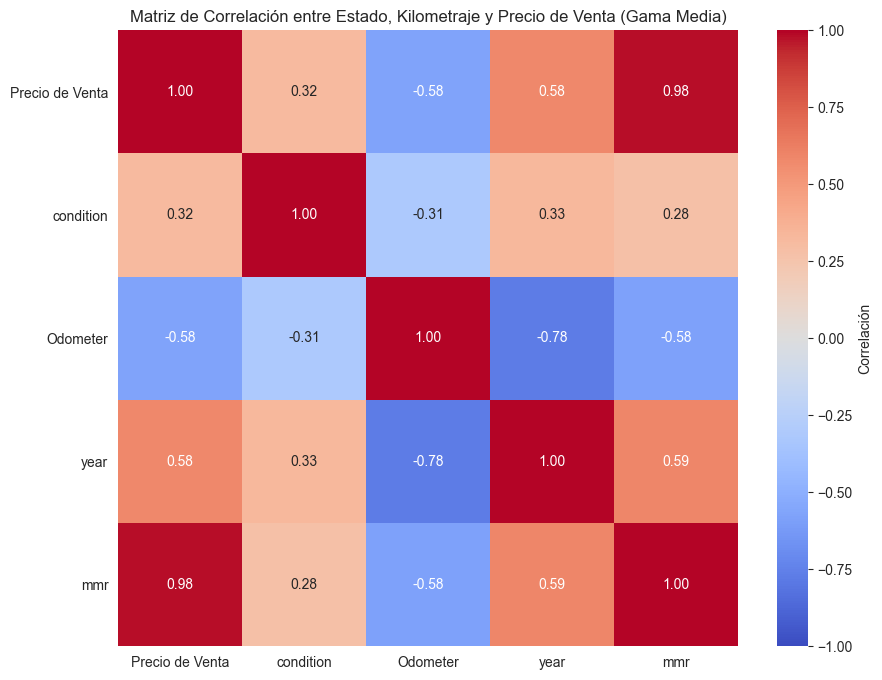

In [26]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(var_cat_correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar_kws={'label': 'Correlación'})

heatmap.set_xticklabels(['Precio de Venta','condition', 'Odometer','year','mmr'])
heatmap.set_yticklabels(['Precio de Venta','condition', 'Odometer','year','mmr'], rotation=0)
plt.title('Matriz de Correlación entre Estado, Kilometraje y Precio de Venta (Gama Media)')
plt.show()

### Analizando correlaciones del DataFrame

El mapa de calor que el MMR y, en menor medida, el kilometraje y el año del vehículo son las variables más relevantes para predecir el precio de venta de autos de los autos. 

Las otras características tienen un impacto mucho menor en la determinación del precio en esta categoría.

### Gama del auto

Ademas de transformar la variable condición de númerica a categorica ahora categorizamos en [Gama Baja, Gama Media y Gama Alta] a los autos a través de una función para comprobar las siguientes hipótesis:

#### Hipótesis
1) La transmisión automática incrementa significativamente el precio de venta de un auto en todas las categorías de gama (Baja, Media, Alta)

2) El kilometraje tiene un impacto negativo mayor en el precio de venta de autos de gama baja en comparación con autos de gama alta

Esta hipótesis analiza la influencia del kilometraje en diferentes segmentos de mercado. Esto permitirá comprobar si la relación entre el kilometraje y el precio de venta es diferente en autos de diferentes gamas y, por lo tanto, si se deben aplicar diferentes estrategias de precios o modelos específicos por segmento.

3) El año de fabricación y la condición del auto son los factores más determinantes en la predicción del precio de venta, independientemente de la gama del auto

4) Los autos de gama alta con menos de 100,000 kilómetros mantienen mejor su valor de mercado en comparación con autos de gama media y baja

5) El MMR tiene una correlación más fuerte con el precio de venta en autos de gama media y alta que en autos de gama baja

Dado que ya he observado una alta correlación entre MMR y el precio de venta, esta hipótesis puede ayudarme a analizar cómo se comporta esta relación en diferentes segmentos de autos. Podría influir en la selección de características para modelos específicos de gama.

In [27]:
# [condition - Estado]	, [sellingprice - Categoria_Precio],
# [year - Categoria_Year],	[odometer - Categoria_Uso]

estado_map = {'Excelente Estado': 2, 'Buen Estado': 1}
categoria_uso_map = {'Bajo Uso': 2, 'Medio Uso': 1}
categoria_precio_map = {'Bajo Uso': 2, 'Medio Uso': 1}
transmission_map = {'automatic': 1}

# Umbrales para precio medio de mercado(MMR)
umbral_mmr_medio = 11250
umbral_mmr_alto = 18300

# Mapear cada fila de acuerdo a las condiciones establecidas
def categorizar_auto_map(row):
    puntaje = 0
    
    # Aplicar el mapeo de condiciones
    puntaje += estado_map.get(row['Estado'], 0)
    puntaje += categoria_uso_map.get(row['Categoria_Uso'], 0)
    puntaje += categoria_precio_map.get(row['Categoria_Precio'], 0)
    puntaje += transmission_map.get(row['transmission'], 0)
    
    # Mapeando mmr en base a umbrales
    puntaje += 2 if row['mmr'] > umbral_mmr_alto else (1 if row['mmr'] > umbral_mmr_medio else 0)

    # Clasificación final
    return 'Gama Alta' if puntaje >= 6 else ('Gama Media' if puntaje >= 3 else 'Gama Baja')

# Aplicar función de categorización a cada fila del df
df['Gama'] = df.apply(categorizar_auto_map, axis=1)
df['Gama'] = df['Gama'].astype('category')

# Revisar la distribución de las gamas
gamas = pd.DataFrame(df.Gama.value_counts()).reset_index()
gamas

,Gama,count
0,Gama Media,287589
1,Gama Baja,158638
2,Gama Alta,87414


In [28]:
# Hipótesis 1:
transmisiones = df[((df.transmission == 'automatic') | (df.transmission == 'manual'))][['Gama', 'transmission']]

df_transmission = pd.DataFrame({'Cantidad': transmisiones.value_counts()}).reset_index()
df_transmission

,Gama,transmission,Cantidad
0,Gama Media,automatic,281243
1,Gama Baja,automatic,149266
2,Gama Alta,automatic,86703
3,Gama Baja,manual,9372
4,Gama Media,manual,6346
5,Gama Alta,manual,711


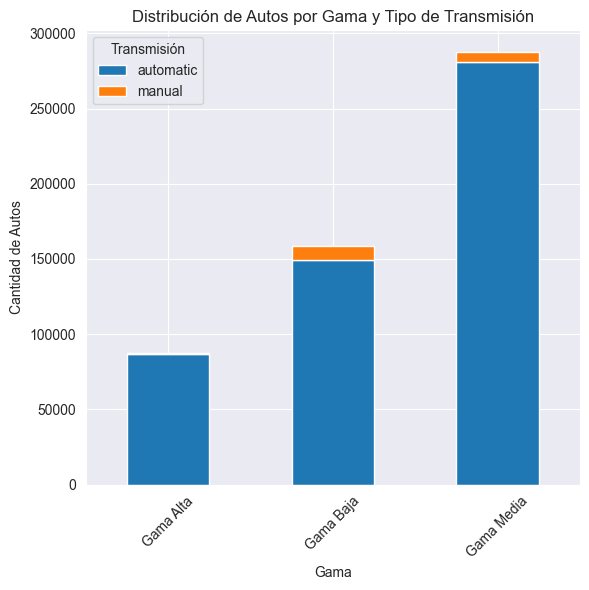

In [29]:
df_pivot = df_transmission.pivot(index='Gama', columns='transmission', values='Cantidad')
df_pivot.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(6, 6))
plt.title('Distribución de Autos por Gama y Tipo de Transmisión')
plt.xlabel('Gama')
plt.ylabel('Cantidad de Autos')
plt.xticks(rotation=45)
plt.legend(title='Transmisión')
plt.tight_layout()
plt.show()

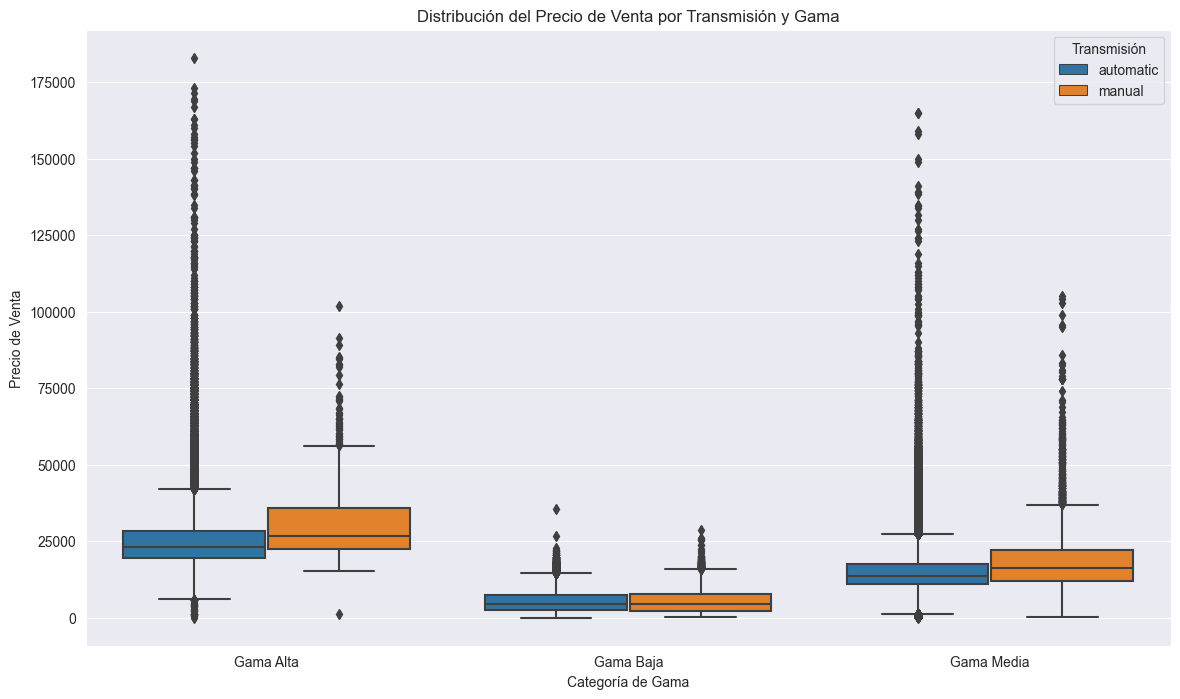

In [30]:
# Crear el boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Gama', y='sellingprice', hue='transmission', data=df)

# Añadir título y etiquetas
plt.title('Distribución del Precio de Venta por Transmisión y Gama')
plt.xlabel('Categoría de Gama')
plt.ylabel('Precio de Venta')
plt.legend(title='Transmisión')

# Mostrar el gráfico
plt.show()

In [31]:
#df_auto = df[df['transmission'] == 'automatic']
df_auto = df

Q1 = df_auto['sellingprice'].quantile(0.25)
Q3 = df_auto['sellingprice'].quantile(0.75)
IQR = Q3 - Q1

outliers_aut = df_auto[((df_auto['sellingprice'] < (Q1 - 1.5 * IQR)) | (df_auto['sellingprice'] > (Q3 + 1.5 * IQR))) & (df_auto.transmission == 'automatic')]
outliers_man = df_auto[((df_auto['sellingprice'] < (Q1 - 1.5 * IQR)) | (df_auto['sellingprice'] > (Q3 + 1.5 * IQR))) & (df_auto.transmission == 'manual')]

print("Número de outliers en autos automáticos:", outliers_aut.shape[0])
print("Número de outliers en autos manuales:", outliers_man.shape[0])
print()
# Mostrar algunos detalles de los outliers
print("Detalles de algunos outliers en autos automáticos:")
print(outliers_aut[['sellingprice', 'year', 'odometer', 'Gama']].sample(5))

Número de outliers en autos automáticos: 15264
Número de outliers en autos manuales: 459

Detalles de algunos outliers en autos automáticos:
        sellingprice  year  odometer        Gama
394913       49750.0  2012   47622.0  Gama Media
35106        55000.0  2014    4781.0   Gama Alta
532416       87250.0  2014   21632.0   Gama Alta
146902       47000.0  2014    7187.0  Gama Media
66887        37400.0  2014   17543.0   Gama Alta


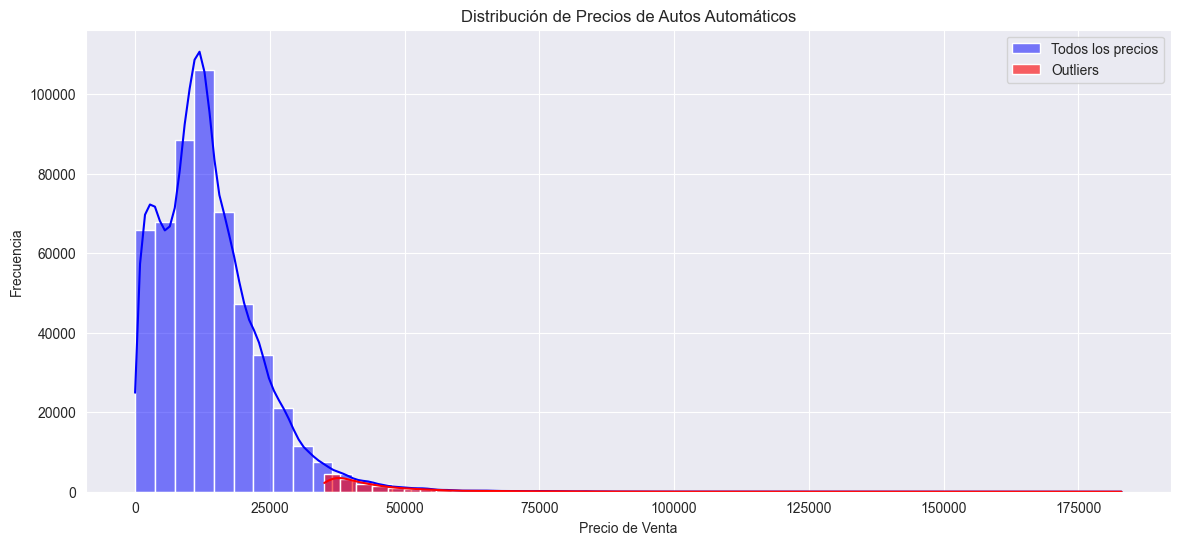

In [32]:
plt.figure(figsize=(14, 6))
sns.histplot(df_auto['sellingprice'], bins=50, kde=True, color='blue', label='Todos los precios')
sns.histplot(outliers_aut['sellingprice'], bins=50, kde=True, color='red', label='Outliers', alpha=0.6)
plt.title('Distribución de Precios de Autos Automáticos')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

La presencia de precios extremadamente altos (outliers) está empujando la cola de la distribución hacia la derecha.

Esto indica que hay algunos autos automáticos que se venden a precios mucho mayores que la mayoría de los autos en el dataset.

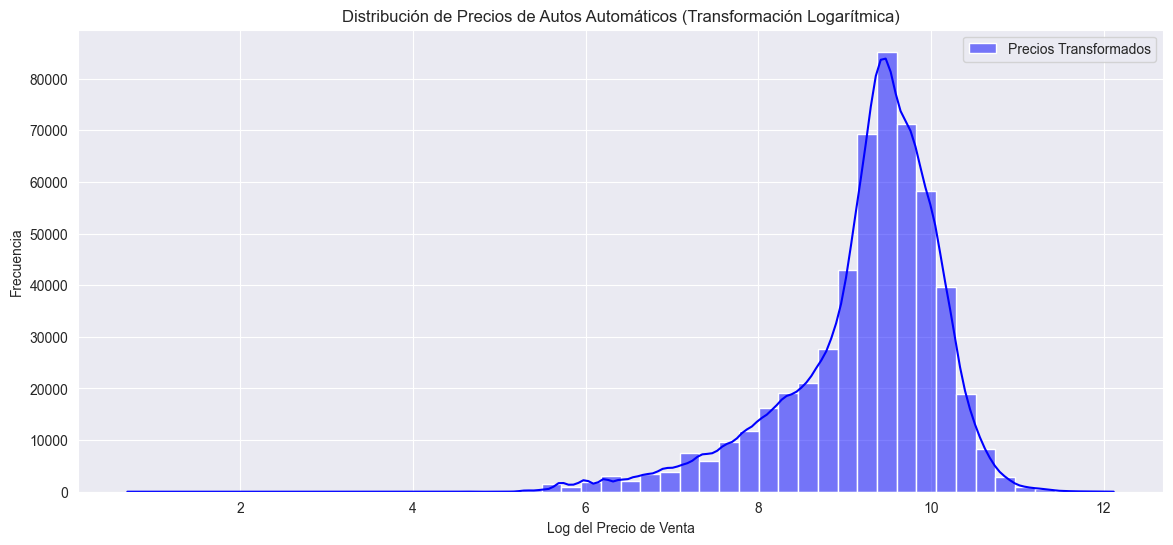

In [33]:
df_auto['log_sellingprice'] = np.log1p(df_auto['sellingprice'])

# Verificar la nueva distribución
plt.figure(figsize=(14, 6))
sns.histplot(df_auto['log_sellingprice'], bins=50, kde=True, color='blue', label='Precios Transformados')
plt.title('Distribución de Precios de Autos Automáticos (Transformación Logarítmica)')
plt.xlabel('Log del Precio de Venta')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [34]:
# Agrupar los outliers por gama
outliers_by_gama = outliers_aut.groupby('Gama')['sellingprice'].describe()
print("Estadísticas descriptivas de los outliers por gama:")
print(outliers_by_gama)

Estadísticas descriptivas de los outliers por gama:
             count          mean           std      min      25%      50%  \
Gama                                                                        
Gama Alta   9922.0  46496.396997  14298.553129  35100.0  37750.0  42000.0   
Gama Baja      1.0  35500.000000           NaN  35500.0  35500.0  35500.0   
Gama Media  5341.0  43328.957124  11228.901859  35100.0  37300.0  40000.0   

                75%       max  
Gama                           
Gama Alta   49500.0  183000.0  
Gama Baja   35500.0   35500.0  
Gama Media  44900.0  165000.0  


In [35]:
max_price = df_auto['sellingprice'].max()
min_price = df_auto['sellingprice'].min()
print(f"Precio máximo de autos automáticos: {max_price}")
print(f"Precio mínimo de autos automáticos: {min_price}")

Precio máximo de autos automáticos: 183000.0
Precio mínimo de autos automáticos: 1.0


### Conlusión hipótesis 1

La hipótesis se cumple. Los resultados muestran que:

En Gama Baja: Los autos automáticos tienen precios más altos en comparación con los manuales, aunque los precios de ambos son relativamente bajos.

En Gama Media: Los autos automáticos tienen precios promedio más altos que los manuales. Los precios de los autos automáticos son consistentemente superiores, y los outliers muestran precios elevados.

En Gama Alta: Los autos automáticos también presentan precios significativamente más altos que los manuales, con una amplia variabilidad en los precios, incluyendo los valores más altos del dataset.
En general, la transmisión automática está asociada con precios de venta más altos en todas las categorías de gama, confirmando que la transmisión automática incrementa el precio de venta.

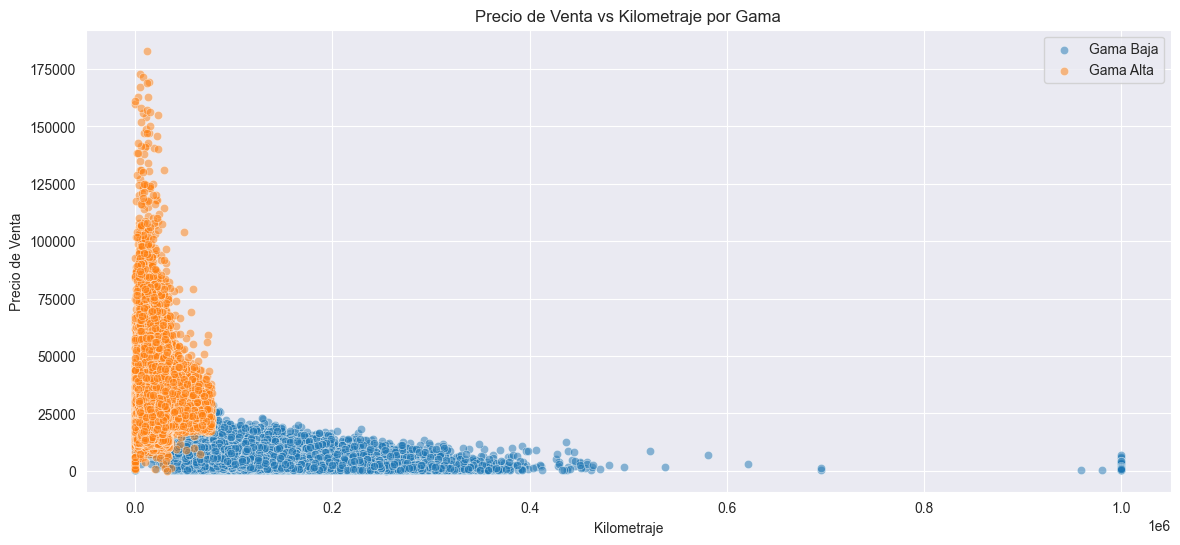

In [36]:
# Hipótesis 2:
# Filtrar datos por gama
df_gama_baja = df[df['Gama'] == 'Gama Baja']
df_gama_alta = df[df['Gama'] == 'Gama Alta']

# Visualización
plt.figure(figsize=(14, 6))
sns.scatterplot(x='odometer', y='sellingprice', data=df_gama_baja, label='Gama Baja', alpha=0.5)
sns.scatterplot(x='odometer', y='sellingprice', data=df_gama_alta, label='Gama Alta', alpha=0.5)
plt.title('Precio de Venta vs Kilometraje por Gama')
plt.xlabel('Kilometraje')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

El análisis del scatterplot refuerza la idea de que el kilometraje tiene un impacto negativo mayor en el precio de venta de autos de gama alta en comparación con autos de gama baja.

In [37]:
# Crear modelos de regresión para cada gama
def run_regression(df, gama_name):
    X = df[['odometer']]
    y = df['sellingprice']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"Resultados de la regresión para {gama_name}:")
    print(model.summary())
    return model

# Regresiones
model_gama_baja = run_regression(df_gama_baja, 'Gama Baja')
model_gama_alta = run_regression(df_gama_alta, 'Gama Alta')

Resultados de la regresión para Gama Baja:
                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                 3.919e+04
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:38:30   Log-Likelihood:            -1.4881e+06
No. Observations:              158638   AIC:                         2.976e+06
Df Residuals:                  158636   BIC:                         2.976e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

### Conlusión hipótesis 2
La hipótesis 2 se cumple parcialmente.

Aunque el impacto del kilometraje en el precio de venta es negativo en ambas gamas, el efecto es mayor en autos de gama alta. Esto significa que, a medida que aumenta el kilometraje, el precio de venta disminuye más significativamente para autos de gama alta en comparación con autos de gama baja. Sin embargo, el bajo R-squared en ambos casos sugiere que otros factores además del kilometraje también juegan un papel importante en la determinación del precio de venta.

In [38]:
# Filtrar autos de Gama Alta fabricados antes de 2010
gama_alta_antes_2010 = df[(df['Gama'] == 'Gama Alta') & (df['year'] < 2010)]

# Variables independientes y dependientes
X = gama_alta_antes_2010[['year', 'odometer', 'Estado_num', 'Categoria_Uso_num']]
y = gama_alta_antes_2010['sellingprice']

# Añadir constante para la regresión
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Imprimir resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     11.70
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           3.35e-09
Time:                        17:38:30   Log-Likelihood:                -7856.4
No. Observations:                 709   AIC:                         1.572e+04
Df Residuals:                     704   BIC:                         1.575e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.905e+06   7.16e+0

### Conlusión hipótesis 3
Al igual que la hipótesis anterior nuestra 3er hipótesis también se cumple parcialmente. 

Aunque el año de fabricación tiene un efecto positivo significativo en el precio, lo que podría sugerir una cierta valorización con el tiempo, el kilometraje también tiene un impacto negativo significativo. 

La condición y el kilometraje del auto no parecen ser factores determinantes en este contexto. 

En general, el bajo R² indica que hay factores adicionales que deben considerarse para una mejor comprensión del precio de los autos de Gama Alta fabricados antes de 2010.

In [39]:
# Filtra los autos con menos de 100,000 kilómetros
df_filtered = df[df['odometer'] < 100000]

# Agrupa por 'Gama' y calcula las estadísticas descriptivas para el precio de venta
gama_stats = df_filtered.groupby('Gama')['sellingprice'].describe()

print("Estadísticas descriptivas para autos con menos de 100,000 kilómetros y por gama:")
print(gama_stats)

f_statistic, p_value = stats.f_oneway(
    df_filtered[df_filtered['Gama'] == 'Gama Alta']['sellingprice'],
    df_filtered[df_filtered['Gama'] == 'Gama Media']['sellingprice'],
    df_filtered[df_filtered['Gama'] == 'Gama Baja']['sellingprice']
)

print(f"\nResultado de la prueba ANOVA:")
print(f"F-statistic: {f_statistic:.2f} ")
print(f"P-value: {p_value}")

Estadísticas descriptivas para autos con menos de 100,000 kilómetros y por gama:
               count          mean           std    min      25%      50%  \
Gama                                                                        
Gama Alta    87414.0  25374.780710  10370.316364    1.0  19500.0  23000.0   
Gama Baja    47055.0   7064.048390   3035.149462  100.0   4900.0   7200.0   
Gama Media  276247.0  15240.556263   7147.924242    1.0  11000.0  13700.0   

                75%       max  
Gama                           
Gama Alta   28500.0  183000.0  
Gama Baja    9100.0   35500.0  
Gama Media  17700.0  165000.0  

Resultado de la prueba ANOVA:
F-statistic: 98715.71 
P-value: 0.0


Los autos de Gama Alta tienen un precio medio significativamente más alto $25.374 en comparación con los autos de Gama Media $15.240 y Gama Baja $7.064. Esto indica que, en general, los autos de gama alta mantienen un valor de mercado superior.

F-statistic es extremadamente alto, lo que sugiere diferencias significativas entre las medias de precios de las diferentes gamas.

P-value es 0.0, lo que indica que las diferencias observadas en los precios de venta entre las gamas son estadísticamente significativas.

### Conclusión Hipótesis 4

Se cumple, ya que los autos de gama alta con menos de 100.000 kilómetros tienen un valor de mercado significativamente mayor en comparación con los autos de gama media y baja

In [40]:
# Filtrar datos por gama
gama_baja = df[df['Gama'] == 'Gama Baja']
gama_media = df[df['Gama'] == 'Gama Media']
gama_alta = df[df['Gama'] == 'Gama Alta']

# Calcular la correlación entre MMR y precio de venta
correlacion_baja = gama_baja['mmr'].corr(gama_baja['sellingprice'])
correlacion_media = gama_media['mmr'].corr(gama_media['sellingprice'])
correlacion_alta = gama_alta['mmr'].corr(gama_alta['sellingprice'])

# Mostrar resultados
print(f'Correlación MMR - Precio en Gama Baja: {correlacion_baja:.4f}')
print(f'Correlación MMR - Precio en Gama Media: {correlacion_media:.4f}')
print(f'Correlación MMR - Precio en Gama Alta: {correlacion_alta:.4f}')

Correlación MMR - Precio en Gama Baja: 0.9183
Correlación MMR - Precio en Gama Media: 0.9676
Correlación MMR - Precio en Gama Alta: 0.9793


### Conclusión Hipótesis 5

Los resultados muestran que el MMR tiene una correlación más fuerte con el precio de venta en autos de gama alta 0,9793 que en autos de gama media 0,9676 y esta a su vez es más fuerte que en autos de gama baja 0,9183.

En base a los análisis realizados y la correlación evaluada se definió utilizar las variables:

- year
- condition
- odometer

Comenzaremos con unos modelos de Regresión de sklearn básico como [LinearRegression] y también evaluaremos la opción de utilizar [GradientBoostingRegressor] en caso de que los valores no nos conformen.

## Modelos de Machine Learning

In [41]:
# Variables independientes (features)
X = df[['year', 'condition', 'odometer']]

# Variable dependiente (target)
y = df['sellingprice']

# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Entrenar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

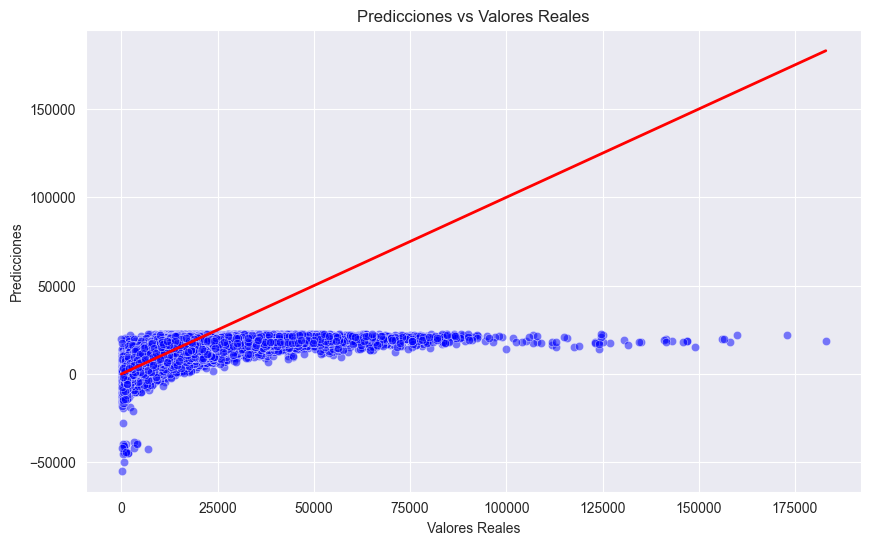

Root train Mean Squared Error: 7570.954900019057
------------------------------------
Root Mean Squared Error: 7503.75
Mean Squared Error: 56306199.07
Coeficiente de Determinación (R^2): 0.39
Mean Absolute Error: 5217.65324536887


In [42]:
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

# Comparación de los valores predichos con los valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))

print(f'Root train Mean Squared Error: {rmse_train}')
print("------------------------------------")
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")
print(f"Mean Absolute Error: {mae}")

In [43]:
X = df[['year', 'condition', 'odometer']]
#X = df[['Categoria_Year_num','Categoria_Uso_num', 'Estado_num', 'Categoria_Precio_num']]
y = df['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
#-------------------------------------------------------------------#
rmse_train = mean_squared_error(y_train,y_pred_train, squared=False)
mse_train = mean_squared_error(y_train,y_pred_train)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")
print(f"Mean Absolute Error: {mae}")
print("------------------------------------------")
print(f'Root train Mean Squared Error: {rmse_train:.2f}')
print(f'Mean train Squared Error: {mse_train:.2f}')

Root Mean Squared Error: 7143.81
Mean Squared Error: 51034035.43
Coeficiente de Determinación (R^2): 0.45
Mean Absolute Error: 4760.115915688201
------------------------------------------
Root train Mean Squared Error: 11416.05
Mean train Squared Error: 130326244.69
